Bag-of-words representation of the corpus:
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1)],
 [(6, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(6, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)],
 [(6, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)],
 [(5, 1), (6, 3), (24, 1), (25, 1), (26, 1), (27, 1)],
 [(6, 1), (12, 1), (14, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)]]

Topics discovered by LDA:
Topic 0: 0.161*"the" + 0.032*"exciting" + 0.032*"was" + 0.032*"and" + 0.032*"football" + 0.032*"played" + 0.032*"well." + 0.032*"game" + 0.032*"team" + 0.032*"election."
Topic 1: 0.139*"the" + 0.047*"a" + 0.047*"of" + 0.046*"team" + 0.046*"before" + 0.046*"match." + 0.046*"campaign" + 0.046*"gained" + 0.046*"coach" + 0.046*"motivated"


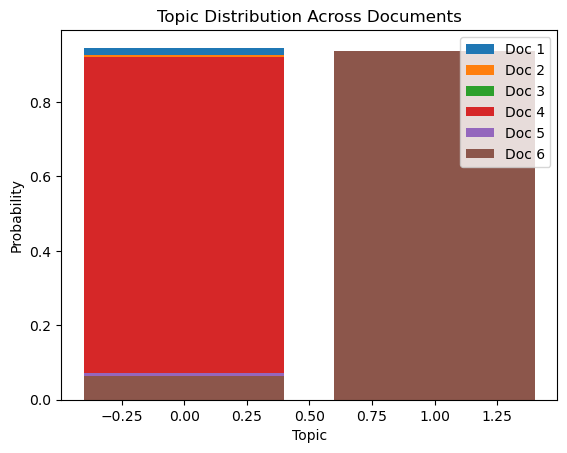

In [1]:
# Import necessary libraries
import gensim
from gensim import corpora
from pprint import pprint
import matplotlib.pyplot as plt

# Sample corpus: A collection of text documents
documents = [
    "The football game was exciting and the team played well.",
    "The government announced the results of the election.",
    "The player scored a fantastic goal.",
    "The parliament discussed new policy changes.",
    "The coach motivated the team before the match.",
    "The election campaign gained a lot of attention."
]

# Preprocessing: Tokenization and lowercasing
texts = [[word.lower() for word in doc.split()] for doc in documents]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Convert the documents into a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Display the corpus (word IDs and frequencies)
print("Bag-of-words representation of the corpus:")
pprint(corpus)

# Train the LDA model with 2 topics
lda_model = gensim.models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10)

# Display the topics with their associated keywords
print("\nTopics discovered by LDA:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic}")

# Visualize the topic distribution for each document
topic_distribution = [lda_model.get_document_topics(bow) for bow in corpus]

# Plot the topic distribution for each document
def plot_topic_distribution(topic_dist, num_docs):
    for i, doc_dist in enumerate(topic_dist):
        topics = [tup[0] for tup in doc_dist]
        weights = [tup[1] for tup in doc_dist]
        plt.bar(topics, weights, label=f'Doc {i+1}')
    
    plt.xlabel('Topic')
    plt.ylabel('Probability')
    plt.title('Topic Distribution Across Documents')
    plt.legend()
    plt.show()

# Plot the topic distribution
plot_topic_distribution(topic_distribution, len(documents))
